In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("dylanjcastillo/7k-books-with-metadata")

print("Path to dataset files:", path)

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
books = pd.read_csv(f"{path}/books.csv")

In [46]:
books.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0


In [48]:
#missing values 

books.isnull().sum()

isbn13               0
isbn10               0
title                0
subtitle          4429
authors             72
categories          99
thumbnail          329
description        262
published_year       6
average_rating      43
num_pages           43
ratings_count       43
dtype: int64

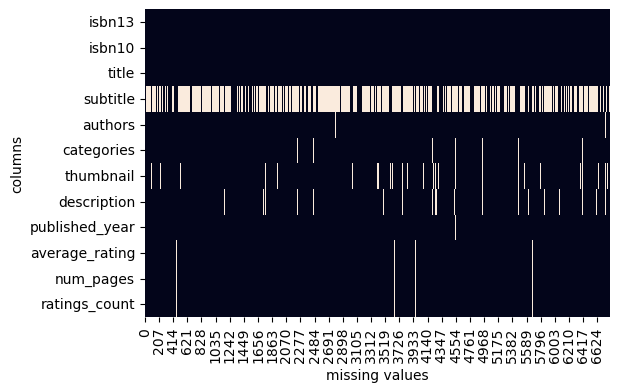

In [55]:
#check if missing values have a pattern, can imply a biais (heatmap)

plt.figure(figsize=(6,4))
sns.heatmap(books.isnull().transpose(), cbar=False)
plt.xlabel("missing values")
plt.ylabel("columns")
plt.show()

In [69]:
# Create new column "missing books", np.where(column description is null, put 1, else 0)

books["missing_description"] = np.where(books["description"].isnull(), 1,0)

In [70]:
# Create a column for the age of the book

books["age_of_book"] = 2025 - books["published_year"]

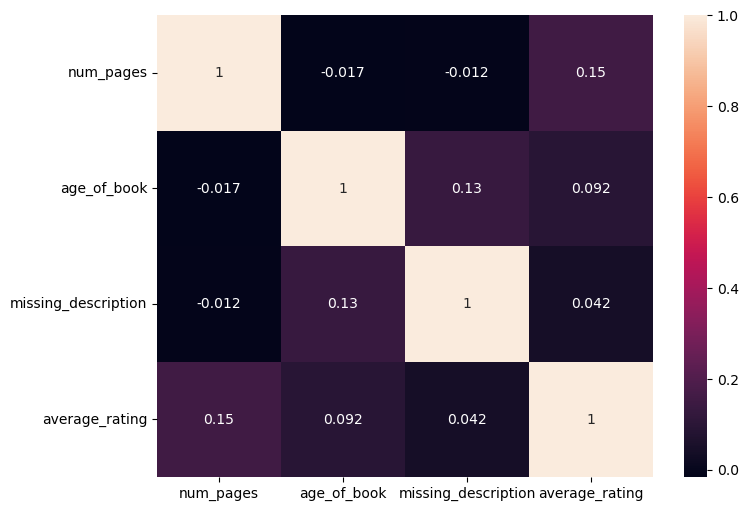

In [83]:
#Create Correlation Matrix 

columns_of_interest = ["num_pages", "age_of_book", "missing_description", "average_rating"]

correlation_matrix = books[columns_of_interest].corr(method="spearman")

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [ ]:
# These specific features that had missing fields and there rows
missing_data = books[books["description"].isnull()|
                     books["average_rating"].isnull()|
                     books["num_pages"].isnull()|
                     books["published_year"].isnull()]

In [ ]:
#Get the indexes of all the rows that had missing info
missing_index = missing_data.index

In [ ]:
#Create new dataframe, that has dropped the missing indexes
df = books.drop(missing_index)

In [125]:
df.shape

(6507, 14)

In [ ]:
#get the value count for the categories column 
book_cat = df["categories"].value_counts()

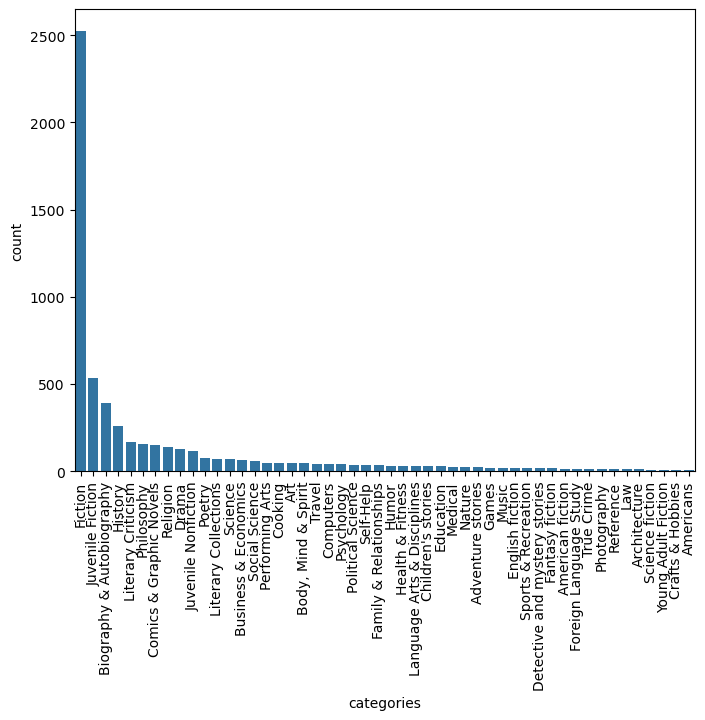

In [148]:
plt.figure(figsize=(8,6))
sns.barplot(book_cat.head(50))
plt.xticks(rotation = 90)
plt.show()

In [151]:
#create a new column that gets the amount of words in each description 

df["words_in_des"] = books["description"].str.split(" ").str.len()

In [167]:
#check differnt lengths of the description, to see how much words are needed to make a good description 
df["description"][(df["words_in_des"] >=25) & (df["words_in_des"]<= 50)]

4       Lewis' work on the nature of love divides love...
9       Kate Blackwell is an enigma and one of the mos...
13      An omnibus volume of the author's complete sto...
14      Available in the U.S. for the first time, this...
19      1968 finds Nicholas Darrow wrestling with pers...
                              ...                        
6775    Presents nearly one thousand recipes--from app...
6779    Edited by the creator and executive producer o...
6797    Rescued from the lockers in which they were le...
6799    This book is the story of a young girl obsesse...
6801    Forster's lively, informed originality and wit...
Name: description, Length: 2808, dtype: object

In [ ]:
# We will have 25 words and above as the ideal number of words for the description 
ideal = df["words_in_des"] >= 25 # this is a conditional statment

# New Data Frame that fits our conditional statement
df = df[ideal]

In [178]:
df["words_in_des"].sort_values(ascending=True)

6364     25.0
3983     25.0
3925     25.0
3892     25.0
3879     25.0
        ...  
5600    512.0
1848    575.0
6700    619.0
4091    621.0
4144    920.0
Name: words_in_des, Length: 5197, dtype: float64

In [180]:
df.shape

(5197, 15)

In [194]:
#Create a new column, that has the title and subtitle

df["title_and_sub"] = np.where(df["subtitle"].isna(), df["title"], df["title"] + ": " + df["subtitle"])

In [195]:
df["title_and_sub"].head()

0                   Gilead
1    Spider's Web: A Novel
3           Rage of angels
4           The Four Loves
5      The Problem of Pain
Name: title_and_sub, dtype: object

In [197]:
df.dtypes

isbn13                   int64
isbn10                  object
title                   object
subtitle                object
authors                 object
categories              object
thumbnail               object
description             object
published_year         float64
average_rating         float64
num_pages              float64
ratings_count          float64
age_of_book            float64
missing_description      int64
words_in_des           float64
title_and_sub           object
dtype: object

In [ ]:
# New column that has the isbn13 tagged with description as a string 
df["tagged_des"] = df[["isbn13", "description"]].astype(str).agg(" ".join, axis=1)

In [200]:
df.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,age_of_book,missing_description,words_in_des,title_and_sub,tagged_des
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,21.0,0,199.0,Gilead,9780002005883 A NOVEL THAT READERS and critics...
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,25.0,0,205.0,Spider's Web: A Novel,9780002261982 A new 'Christie for Christmas' -...
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,32.0,0,57.0,Rage of angels,"9780006178736 A memorable, mesmerizing heroine..."
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,23.0,0,45.0,The Four Loves,9780006280897 Lewis' work on the nature of lov...
5,9780006280934,0006280935,The Problem of Pain,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,23.0,0,75.0,The Problem of Pain,"9780006280934 ""In The Problem of Pain, C.S. Le..."


In [201]:
df.drop(["words_in_des", "missing_description", "age_of_book", "subtitle"], axis=1, inplace=True)

In [202]:
df.head()

,isbn13,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,title_and_sub,tagged_des
0,9780002005883,0002005883,Gilead,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,Gilead,9780002005883 A NOVEL THAT READERS and critics...
1,9780002261982,0002261987,Spider's Web,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,Spider's Web: A Novel,9780002261982 A new 'Christie for Christmas' -...
3,9780006178736,0006178731,Rage of angels,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,Rage of angels,"9780006178736 A memorable, mesmerizing heroine..."
4,9780006280897,0006280897,The Four Loves,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,The Four Loves,9780006280897 Lewis' work on the nature of lov...
5,9780006280934,0006280935,The Problem of Pain,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,The Problem of Pain,"9780006280934 ""In The Problem of Pain, C.S. Le..."


In [203]:
df.to_csv("books_clean.csv", index=False)